In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 13s 0us/step


In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) # Output layer with 10 units (one for each class)
])

In [23]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [50]:
from tensorflow.keras.callbacks import EarlyStopping, BackupAndRestore, CSVLogger, ModelCheckpoint

In [ ]:
history = model.fit(
    train_images, train_labels, epochs=10000000, validation_data=(test_images, test_labels),
    callbacks=[
        EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20),
        BackupAndRestore(backup_dir='output_model'),
        CSVLogger('model.csv'),
        ModelCheckpoint('output_model_checkpoint')
      ]
)

Epoch 1/10000000
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0961 - accuracy: 0.9688 - val_loss: 1.7154 - val_accuracy: 0.7352
Epoch 2/10000000
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1004 - accuracy: 0.9685 - val_loss: 1.8576 - val_accuracy: 0.7228
Epoch 3/10000000
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0927 - accuracy: 0.9712 - val_loss: 1.8822 - val_accuracy: 0.7191
Epoch 4/10000000
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0958 - accuracy: 0.9704 - val_loss: 1.9990 - val_accuracy: 0.7204
Epoch 5/10000000
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0967 - accuracy: 0.9694 - val_loss: 1.8636 - val_accuracy: 0.7176
Epoch 6/10000000
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0912 - accuracy: 0.9712 - val_loss: 1.9039 - val_accuracy: 0.7202
Epoch 7/10000000
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0905 - ac

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.9324 - accuracy: 0.7366
Test Accuracy: 0.7365999817848206


In [48]:
import pandas as pd
model_history = pd.read_csv('model.csv')
model_history.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.95840,0.125252,0.7205,1.573474
1,1,0.96228,0.116621,0.7232,1.621063
2,2,0.96030,0.120603,0.7189,1.636273
3,3,0.96404,0.108877,0.7154,1.831095
4,4,0.96454,0.111788,0.7228,1.806180


<Axes: xlabel='epoch', ylabel='loss'>

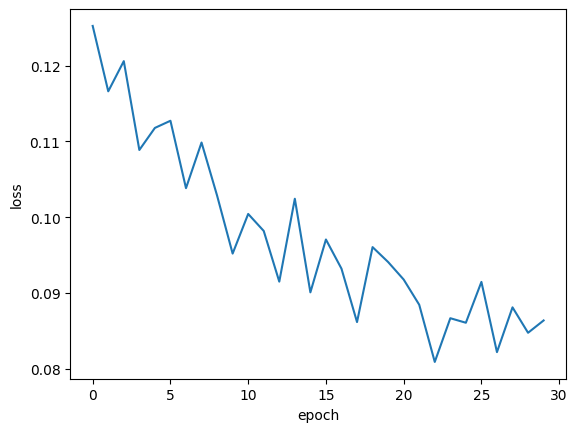

In [49]:
import seaborn as sns
sns.lineplot(model_history, x='epoch', y='loss')

In [12]:
import numpy as np
import matplotlib.pyplot as plt

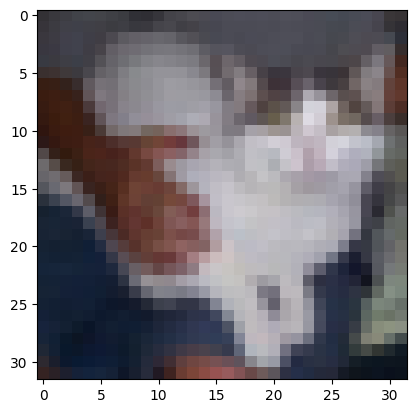

In [32]:
plt.imshow(test_images[77])

In [33]:
model.predict(np.expand_dims(test_images[77], 0))

1/1 [==============================] - 0s 20ms/step


array([[ -3.438864 ,  -5.7907195,  -1.0139695,   6.4024754,   0.5230799,
          2.7040007,  -1.2327964,  -2.9301157,  -2.3475938, -10.146573 ]],
      dtype=float32)

Here are the classes in the dataset, as well as 10 random images from each:  
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck

TypeError: 'History' object is not subscriptable